<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploration on 'undesa_pd_2020_ims_stock_by_age_sex_and_destination'**


Population aging and labour force migrant are both keen concerns of today's world, particularly for countries whose development largely depends on demographic dividend. As one dataset provided by United Nation's, the <code>undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx</code> of 'undesa_pd_2020' datasets includes the patterns of total population and the migrant flows collected every 5 years, from 1990 to 2020, from which some further information of population aging and immigrant stock can be disclosed. 

This lab will guide us through the series of steps in EDA and hypothesis testing, which are to help decision making, using the statistical evidence, a certain effect of an attribute or a combination of attributes on the insurance claims. It will introduce us to the initial steps in the decision making, before building the prediction models and classifiers.


## Objectives


This lab will be able to cover:


*   Brief description of the data set and a summary of its attributes
*   Initial plan for data exploration
*   Actions taken for data cleaning and feature engineering
*   Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
*   Formulating at least 3 hypothesis about this data
*   Conducting a formal significance test for one of the hypotheses and discuss the results 
*   Suggestions for next steps in analyzing this data
*   A paragraph that summarizes the quality of this data set and a request for additional data if needed

***


## **Setting-ups and installing libraries**


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for statistical analysis.
*   [`statsmodels`](https://www.statsmodels.org/stable/index.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for statistical analysis.


The following required modules are pre-installed in the Skills Network Labs environment. However if we run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) we will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

Intall the special library necessary for calling pd.read_excel():

In [3]:
! pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.3/251.3 kB 20.7 MB/s eta 0:00:00


## **Loading and cleaning data**


For this lab, we will be using the <code>undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx</code> file, hosted on development sectors of UN.

The whole dataset presents estimates of international migrant by age, sex and origin. Estimates are presented for 1990, 1995, 2000, 2005, 2010, 2015 and 2020 and are available for 232 countries and areas of the world. The estimates are based on official statistics on the foreign-born or the foreign population.

The estimates of the number (or “stock”) of international migrants disaggregated by age, sex and country or area of origin are based on national statistics, in most cases obtained from population censuses. Additionally, population registers and nationally representative surveys provided information on the number and composition of international migrants.


First, let's download the file from the website 'https://www.un.org/development/desa/pd/sites/www.un.org.development.desa.pd/files/undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx' using the coding below. Besides, we can download it [here](https://www.un.org/development/desa/pd/sites/www.un.org.development.desa.pd/files/undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx) and then upload it to the workspace mannually.

In [4]:
#!wget -P data https://www.un.org/development/desa/pd/sites/www.un.org.development.desa.pd/files/undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx

Among the dataset, the sheet `Table 2` contains total population at mid-year by age and sex and by region, country or area of destination, 1990-2020 (thousands). Let's first read the data into *pandas* data frame of `data2`. We perform the data cleaning for this table.

In [5]:
start_row = 10
data2 = pd.read_excel('undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx', sheet_name='Table 2', header=start_row)
data2.head()

Index  Year Region, development group, country or area Notes  \
0      1  1990                                      WORLD   NaN   
1      2  1995                                      WORLD   NaN   
2      3  2000                                      WORLD   NaN   
3      4  2005                                      WORLD   NaN   
4      5  2010                                      WORLD   NaN   

   Location code Type of data         0-4         5-9       10-14       15-19  \
0            900          NaN  643553.449  575774.199  528772.881  518869.475   
1            900          NaN  619842.533  630434.201  572597.296  524436.172   
2            900          NaN  615665.603  608770.151  626882.754  568145.019   
3            900          NaN  627238.009  607186.636  606628.728  622163.825   
4            900          NaN  652014.313  619554.871  604972.074  602027.558   

   ...     35-39.2     40-44.2     45-49.2     50-54.2     55-59.2  \
0  ...  172361.626  139002.875  112989.892  106781.328    93546.26   
1  ...  187490.653  170028.984  136300.221  110085.762  102659.907   
2  ...  211271.763  184962.165  167016.867  132979.918  105959.066   
3  ...   233386.51  208210.679  181231.714  163015.481  128637.109   
4  ...   243873.79  230557.183  205213.589  177498.044  157642.813   

      60-64.2    65-69.2    70-74.2       75+.2      Total.2  
0   82402.414  67298.802  48127.661    73197.09  2646335.779  
1   88146.065   75008.38  57818.814   80284.374  2852071.381  
2   97026.392  80658.785  65037.963   92576.211  3050059.948  
3  100378.204  88844.348  70150.732  106850.504  3245421.689  
4  121963.781  92682.659  78080.582  122567.042  3449119.953  

[5 rows x 57 columns]

In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Index                                       1981 non-null   int64  
 1   Year                                        1981 non-null   int64  
 2   Region, development group, country or area  1981 non-null   object 
 3   Notes                                       287 non-null    object 
 4   Location code                               1981 non-null   int64  
 5   Type of data                                1624 non-null   object 
 6   0-4                                         1981 non-null   object 
 7   5-9                                         1981 non-null   object 
 8   10-14                                       1981 non-null   object 
 9    15-19                                      1981 non-null   object 
 10  20-24       

It has 57 fields. Note that the series field names like '0-4, 5-9, ..., Total' repeat for 3 times. In original table, the first one is 'total population at mid-year by age, both sexes combined (thousands)', the other two is at same type of observation but sliced by sex. We will focus only on ages and make it less confusing, so drop the other two using `drop` method.

In [7]:
cols_to_drop = data2.columns.tolist()[23:]
data2 = data2.drop(cols_to_drop, axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Index                                       1981 non-null   int64  
 1   Year                                        1981 non-null   int64  
 2   Region, development group, country or area  1981 non-null   object 
 3   Notes                                       287 non-null    object 
 4   Location code                               1981 non-null   int64  
 5   Type of data                                1624 non-null   object 
 6   0-4                                         1981 non-null   object 
 7   5-9                                         1981 non-null   object 
 8   10-14                                       1981 non-null   object 
 9    15-19                                      1981 non-null   object 
 10  20-24       

Rename some fields for original bugs. **Note that the series field names of '0-4, 5-9, ..., Total' should all be numerical varibles**, so we change the object type to float. Before that, note there are some rows with these values as '..' (probably due to data shortages in some countries), we need to drop these rows first.

In [8]:
for col in data2.columns.tolist():
    data2.rename(columns={col:col.strip()}, inplace=True)
cols_to_float = data2.columns.tolist()[6:]
for col in cols_to_float:
    data2 = data2.drop(data2[data2[col]=='..'].index)
for col in cols_to_float:
    data2[col] = data2[col].astype('float')
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743 entries, 0 to 1966
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Index                                       1743 non-null   int64  
 1   Year                                        1743 non-null   int64  
 2   Region, development group, country or area  1743 non-null   object 
 3   Notes                                       140 non-null    object 
 4   Location code                               1743 non-null   int64  
 5   Type of data                                1400 non-null   object 
 6   0-4                                         1743 non-null   float64
 7   5-9                                         1743 non-null   float64
 8   10-14                                       1743 non-null   float64
 9   15-19                                       1743 non-null   float64
 10  20-24       

We can see the remaining data of the series fields are all Non-Null, which is ready for analysis. 

Among the dataset, the sheet `Table 1` contains international migrant stock at mid-year by age and sex and by region, country or area of destination, 1990-2020. Let's read this data into *pandas* data frame of `data1`. Due to the similar structure of sheet layout in <code>undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx</code>, the data cleaning process is just similar for this table.

In [9]:
start_row = 10
data1 = pd.read_excel('undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx', sheet_name='Table 1', header=start_row)
cols_to_drop = data1.columns.tolist()[23:]
data1 = data1.drop(cols_to_drop, axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Index                                       1981 non-null   int64 
 1   Year                                        1981 non-null   int64 
 2   Region, development group, country or area  1981 non-null   object
 3   Notes                                       287 non-null    object
 4   Location code                               1981 non-null   int64 
 5   Type of data                                1624 non-null   object
 6   0-4                                         1981 non-null   object
 7   5-9                                         1981 non-null   object
 8   10-14                                       1981 non-null   object
 9    15-19                                      1981 non-null   object
 10  20-24                   

In [10]:
for col in data1.columns.tolist():
    data1.rename(columns={col:col.strip()}, inplace=True)
cols_to_float = data1.columns.tolist()[6:]
for col in cols_to_float:
    data1 = data1.drop(data1[data1[col]=='..'].index)
for col in cols_to_float:
    data1[col] = data1[col].astype('float')
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924 entries, 0 to 1980
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Index                                       1924 non-null   int64  
 1   Year                                        1924 non-null   int64  
 2   Region, development group, country or area  1924 non-null   object 
 3   Notes                                       259 non-null    object 
 4   Location code                               1924 non-null   int64  
 5   Type of data                                1588 non-null   object 
 6   0-4                                         1924 non-null   float64
 7   5-9                                         1924 non-null   float64
 8   10-14                                       1924 non-null   float64
 9   15-19                                       1924 non-null   float64
 10  20-24       

## **Understanding and joining data**

The column `Region, development group, country or area` is shared by both tables, which is a categorical variable. Let's take a glance at their values.


In [11]:
data1['Region, development group, country or area'].value_counts()

  Australia and New Zealand      14
WORLD                             7
   Spain*                         7
   Liechtenstein                  7
   Germany                        7
                                 ..
   Wallis and Futuna Islands*     7
   Sint Maarten (Dutch part)*     4
   Montenegro                     3
   Curaçao*                       3
   South Sudan                    3
Name: Region, development group, country or area, Length: 276, dtype: int64

In [12]:
data2['Region, development group, country or area'].value_counts()

  Australia and New Zealand    14
WORLD                           7
   Malta                        7
   Iceland                      7
   Ireland                      7
                               ..
   Tajikistan                   7
   Turkmenistan                 7
   Uzbekistan                   7
  Eastern Asia                  7
   Tonga                        7
Name: Region, development group, country or area, Length: 248, dtype: int64

As we can see, in the field of 'Region, development group, country or area', there are different sorts of items among values in at least 3 levels, region, development group and country or area. In empirical knowledge, the policy making for population aging and immigrant stock is country-wise. So we only focus on rows representing country or area of these two tables, which are to be selected by this field.

On this concern, fortunately, there is another field of `Type of data`, if non-null representing the situation in level of country or area. So we can select rows whose `Type of data` is non-null to mask the data for country or area. **We will make the copies whose name end with '_CR' for preserving the original table data**.

In [13]:
data1_CR = data1.dropna(subset=['Type of data'])
data1_CR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588 entries, 161 to 1980
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Index                                       1588 non-null   int64  
 1   Year                                        1588 non-null   int64  
 2   Region, development group, country or area  1588 non-null   object 
 3   Notes                                       259 non-null    object 
 4   Location code                               1588 non-null   int64  
 5   Type of data                                1588 non-null   object 
 6   0-4                                         1588 non-null   float64
 7   5-9                                         1588 non-null   float64
 8   10-14                                       1588 non-null   float64
 9   15-19                                       1588 non-null   float64
 10  20-24     

In [14]:
data2_CR = data2.dropna(subset=['Type of data'])
data2_CR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 161 to 1966
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Index                                       1400 non-null   int64  
 1   Year                                        1400 non-null   int64  
 2   Region, development group, country or area  1400 non-null   object 
 3   Notes                                       140 non-null    object 
 4   Location code                               1400 non-null   int64  
 5   Type of data                                1400 non-null   object 
 6   0-4                                         1400 non-null   float64
 7   5-9                                         1400 non-null   float64
 8   10-14                                       1400 non-null   float64
 9   15-19                                       1400 non-null   float64
 10  20-24     

We can see that the number of rows representing country or area is different between these two tables. That is to say, the selected rows may represent different countries or areas. We just focus on the common values of such field between the two table and drop the rest rows, which is idential to 'inner join' of database. **Note there are end-spaces in values of 'Region, development group, country or area' field. Delete them to avoid any controversial reference**.

In [15]:
data1_CR['Region, development group, country or area'] = data1_CR['Region, development group, country or area'].str.strip()
data2_CR['Region, development group, country or area'] = data2_CR['Region, development group, country or area'].str.strip()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


To merge two tables based on same values of common fields, we can use `pd.merge(df1, df2, on=[<common field>], how='inner')`, **but don't forget to refer another field of 'year' in common fields as well**.

In [16]:
data_CR = pd.merge(data2_CR, data1_CR, on=['Region, development group, country or area', 'Year'], how='inner')
data_CR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1387
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Index_x                                     1388 non-null   int64  
 1   Year                                        1388 non-null   int64  
 2   Region, development group, country or area  1388 non-null   object 
 3   Notes_x                                     136 non-null    object 
 4   Location code_x                             1388 non-null   int64  
 5   Type of data_x                              1388 non-null   object 
 6   0-4_x                                       1388 non-null   float64
 7   5-9_x                                       1388 non-null   float64
 8   10-14_x                                     1388 non-null   float64
 9   15-19_x                                     1388 non-null   float64
 10  20-24_x     

We can see that there are 1388 common rows depending on common fields of ['Year', 'Region, development group, country or area']. The output field names ending with '_x' is the first augment of `merge` function, namely data2_CR of sheet 'Table 2' containing total population. We need to rename the series fields into names ending with '_totalpop'. Similarly, We need to change the series field names ending with '_y' into those ending with '_migrants'.

In [17]:
for col in data_CR.columns.tolist():
    if col[-2:]=='_x':
        data_CR.rename(columns={col:col[:-2]+'_totalpop'}, inplace=True)
    elif col[-2:]=='_y':
        data_CR.rename(columns={col:col[:-2]+'_migrants'}, inplace=True)
data_CR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1387
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Index_totalpop                              1388 non-null   int64  
 1   Year                                        1388 non-null   int64  
 2   Region, development group, country or area  1388 non-null   object 
 3   Notes_totalpop                              136 non-null    object 
 4   Location code_totalpop                      1388 non-null   int64  
 5   Type of data_totalpop                       1388 non-null   object 
 6   0-4_totalpop                                1388 non-null   float64
 7   5-9_totalpop                                1388 non-null   float64
 8   10-14_totalpop                              1388 non-null   float64
 9   15-19_totalpop                              1388 non-null   float64
 10  20-24_totalp

Now, we get the data containing two sets of variables based on common fields prepared.

## **Try plotting some data**

Use plotly.express library (usually imported as px) functions to create entire figures of 'Total_totalpop' at once:

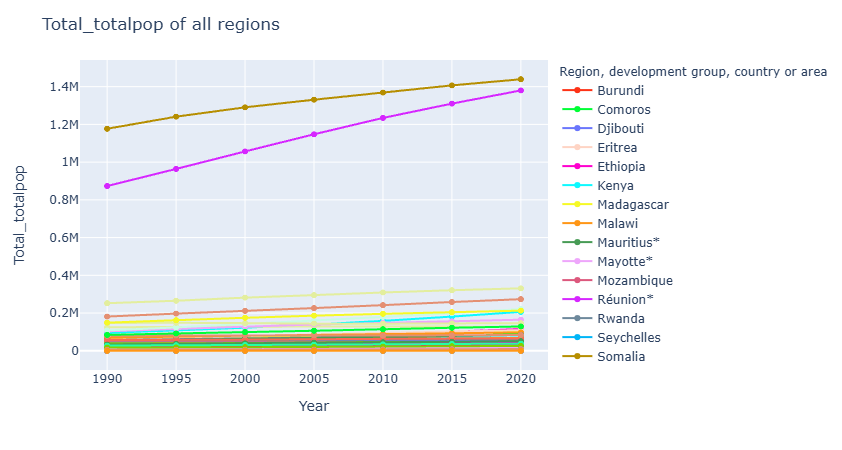

In [18]:
fig = px.line(data_CR, x='Year', y = 'Total_totalpop', color = 'Region, development group, country or area', color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(title='Total_totalpop of all regions', xaxis_title='Year', yaxis_title='Total_totalpop')
fig.show()

Use plotly.express library functions to create entire figures of 'Total_migrants' at once:

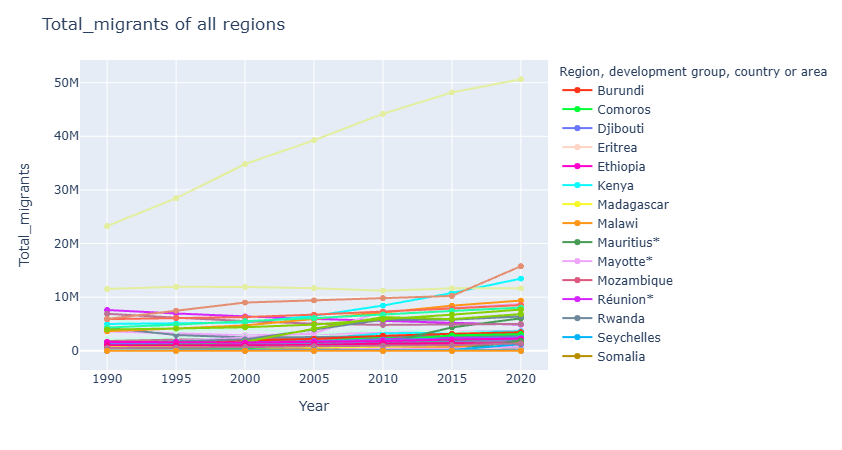

In [19]:
fig = px.line(data_CR, x='Year', y = 'Total_migrants', color = 'Region, development group, country or area', color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(title='Total_migrants of all regions', xaxis_title='Year', yaxis_title='Total_migrants')
fig.show()

To make more customized functions, first let's declare the magic coding by:

In [20]:
%matplotlib inline

Because the various size among countries and regions, to study the total_num or other scale indicators is not very straightforward. We then introduce the growth rate of total population and plot the result. Considering the data structure, we will use the **'every-5-year growth rate of pop'** to quantify.

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Every-5-year Growth of Total_totalpop'),
 Text(0.5, 1.0, 'Growth of Total_totalpop in China, Hong Kong SAR*')]

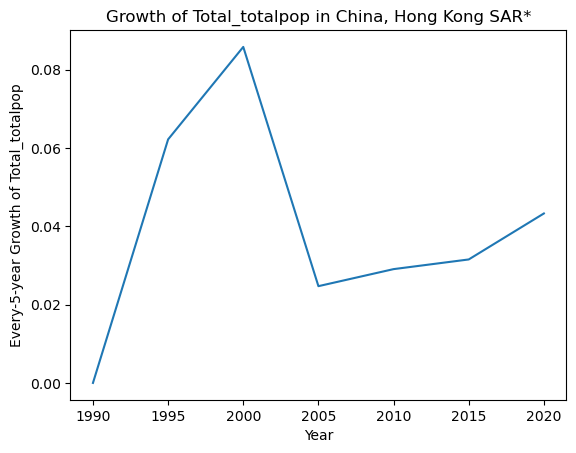

In [21]:
target_index = 'Total_totalpop'
target_region = 'China, Hong Kong SAR*'
growth_rates = []
# make sure the data in order
data_CR_i = data_CR[data_CR['Region, development group, country or area']==target_region].sort_values(by='Year', ascending=True)
for i, vi in enumerate(data_CR_i[target_index]):
    if i==0:
        v0 = vi
    growth_rate = (vi - v0)/v0
    growth_rates.append(growth_rate)
    v0 = vi
#growth_rates
ax = plt.axes()
ax.plot(data_CR_i['Year'], growth_rates)
# Label the axes
ax.set(xlabel='Year', ylabel='Every-5-year Growth of '+target_index, title='Growth of '+target_index+' in '+target_region)

We can put the above codes in a function with batch input, and carry out the process for multiple countries at one time. We can use it to plot every-5-year Growth of 'Total_totalpop':

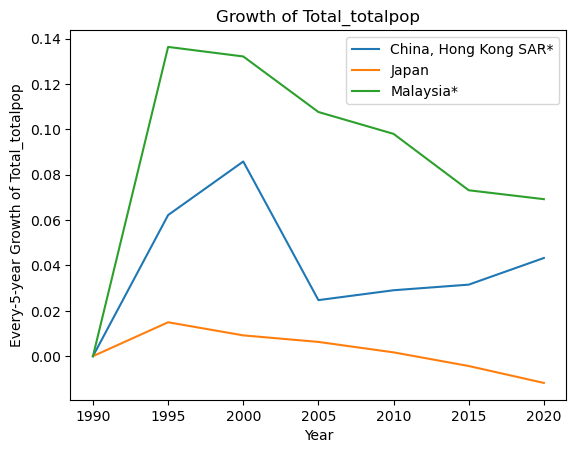

In [22]:
def plotgrowthrates(target_index, target_regions):
    ax = plt.axes()
    # Label the axes
    ax.set(xlabel='Year', ylabel='Every-5-year Growth of '+target_index, title='Growth of '+target_index)
    for target_region in target_regions:
        growth_rates = []
        # make sure the data in order
        data_CR_i = data_CR[data_CR['Region, development group, country or area']==target_region].sort_values(by='Year', ascending=True)
        for i, vi in enumerate(data_CR_i[target_index]):
            if i==0:
                v0 = vi
            growth_rate = (vi - v0)/v0
            growth_rates.append(growth_rate)
            v0 = vi
        #growth_rates
        ax.plot(data_CR_i['Year'], growth_rates, label=target_region)
    ax.legend()

plotgrowthrates('Total_totalpop', ['China, Hong Kong SAR*', 'Japan', 'Malaysia*'])

Similarly, we can use it to plot every-5-year Growth of 'Total_migrants':

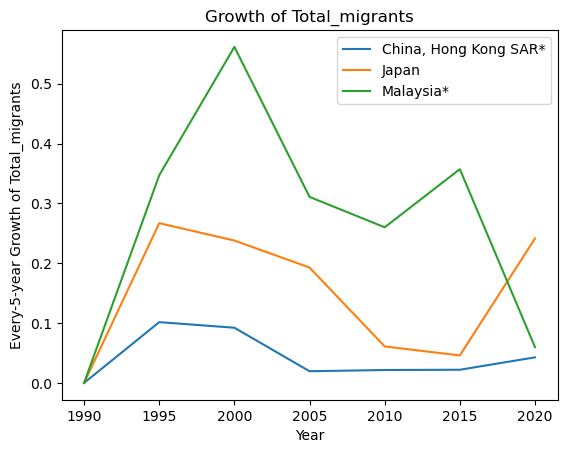

In [23]:
def plotgrowthrates(target_index, target_regions):
    ax = plt.axes()
    # Label the axes
    ax.set(xlabel='Year', ylabel='Every-5-year Growth of '+target_index, title='Growth of '+target_index)
    for target_region in target_regions:
        growth_rates = []
        # make sure the data in order
        data_CR_i = data_CR[data_CR['Region, development group, country or area']==target_region].sort_values(by='Year', ascending=True)
        for i, vi in enumerate(data_CR_i[target_index]):
            if i==0:
                v0 = vi
            growth_rate = (vi - v0)/v0
            growth_rates.append(growth_rate)
            v0 = vi
        #growth_rates
        ax.plot(data_CR_i['Year'], growth_rates, label=target_region)
    ax.legend()

plotgrowthrates('Total_migrants', ['China, Hong Kong SAR*', 'Japan', 'Malaysia*'])

We can define another function to disclose the correlation between the growth rates of selected 'comparable' variables:

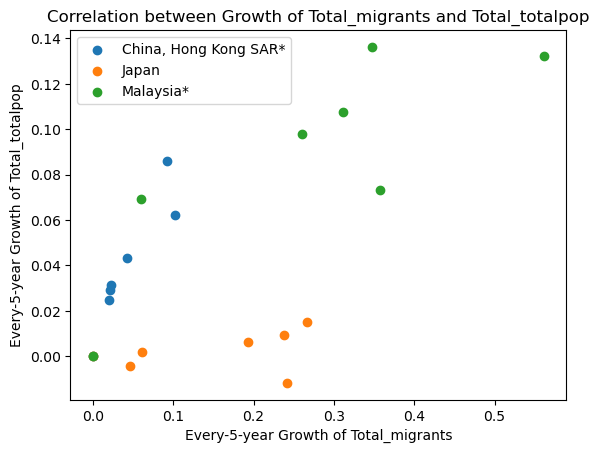

In [24]:
def cor4gradient(index1, index2, target_regions):
    ax = plt.axes()
    # Label the axes
    ax.set(xlabel='Every-5-year Growth of '+index1, ylabel='Every-5-year Growth of '+index2, title='Correlation between Growth of '+index1+' and '+index2)
    for target_region in target_regions:
        data_CR_i = data_CR[data_CR['Region, development group, country or area']==target_region].sort_values(by='Year', ascending=True)
        growth1_rates = []
        for i, vi in enumerate(data_CR_i[index1]):
            if i==0:
                v0 = vi
            growth1_rate = (vi - v0)/v0
            growth1_rates.append(growth1_rate)
            v0 = vi
        growth2_rates = []
        for i, vi in enumerate(data_CR_i[index2]):
            if i==0:
                v0 = vi
            growth2_rate = (vi - v0)/v0
            growth2_rates.append(growth2_rate)
            v0 = vi
        ax.scatter(growth1_rates, growth2_rates, label=target_region)
    ax.legend()

cor4gradient('Total_migrants', 'Total_totalpop', ['China, Hong Kong SAR*', 'Japan', 'Malaysia*'])

The above **idea of Growth Rate** is one way to derive information out from scale indicators which can be compare regardless of scaling effect. Besides, the **idea of Proportion** can also perform such derivation.

As original concerns, we then introduce the 2 important indicators of popluation patterns, one being **Working Age Population Rate** (WPR, proportion of age 15 to 64), the other being **Ageing Population Rate** (APR, proportion of age not less than 65).

Because the derivation is more superficial and to deploy plotly.express etc., we carry out the feature engineering in newly-created fields of table rather than put it into a function, respectively for total population and migrants stock.

In [25]:
data_CR['WPR_totalpop'] = (data_CR['15-19_totalpop'] + 
                           data_CR['20-24_totalpop'] + 
                           data_CR['25-29_totalpop'] + 
                           data_CR['30-34_totalpop'] + 
                           data_CR['35-39_totalpop'] + 
                           data_CR['40-44_totalpop'] + 
                           data_CR['45-49_totalpop'] + 
                           data_CR['50-54_totalpop'] +
                           data_CR['55-59_totalpop'] + 
                           data_CR['60-64_totalpop'])/data_CR['Total_totalpop']
data_CR['APR_totalpop'] = (data_CR['65-69_totalpop'] + 
                           data_CR['70-74_totalpop'] + 
                           data_CR['75+_totalpop']  )/data_CR['Total_totalpop']
data_CR['WPR_migrants'] = (data_CR['15-19_migrants'] + 
                           data_CR['20-24_migrants'] + 
                           data_CR['25-29_migrants'] + 
                           data_CR['30-34_migrants'] + 
                           data_CR['35-39_migrants'] + 
                           data_CR['40-44_migrants'] + 
                           data_CR['45-49_migrants'] + 
                           data_CR['50-54_migrants'] +
                           data_CR['55-59_migrants'] + 
                           data_CR['60-64_migrants'])/data_CR['Total_migrants']
data_CR['APR_migrants'] = (data_CR['65-69_migrants'] + 
                           data_CR['70-74_migrants'] + 
                           data_CR['75+_migrants']  )/data_CR['Total_migrants']
data_CR.head()

Index_totalpop  Year Region, development group, country or area  \
0             162  1990                                    Burundi   
1             163  1995                                    Burundi   
2             164  2000                                    Burundi   
3             165  2005                                    Burundi   
4             166  2010                                    Burundi   

  Notes_totalpop  Location code_totalpop Type of data_totalpop  0-4_totalpop  \
0            NaN                     108                   B R      1096.536   
1            NaN                     108                   B R      1167.688   
2            NaN                     108                   B R      1155.817   
3            NaN                     108                   B R      1306.825   
4            NaN                     108                   B R      1578.653   

   5-9_totalpop  10-14_totalpop  15-19_totalpop  ...  55-59_migrants  \
0       851.909         657.512         511.834  ...         11621.0   
1      1018.813         825.584         621.778  ...          8891.0   
2      1071.660         966.550         756.273  ...          4706.0   
3      1101.745        1051.291         946.632  ...          5824.0   
4      1257.540        1080.003        1036.505  ...          9310.0   

   60-64_migrants  65-69_migrants  70-74_migrants  75+_migrants  \
0          9925.0          7646.0          3058.0        4598.0   
1          7593.0          5850.0          2340.0        3516.0   
2          3131.0          2637.0          2435.0        1465.0   
3          4105.0          3404.0          2932.0        2060.0   
4          6653.0          4629.0          3422.0        3939.0   

   Total_migrants  WPR_totalpop  APR_totalpop  WPR_migrants  APR_migrants  
0        333110.0      0.493316      0.027557      0.753757      0.045937  
1        254853.0      0.471489      0.025410      0.753760      0.045932  
2        125628.0      0.474297      0.024983      0.745686      0.052035  
3        192774.0      0.507459      0.022762      0.658813      0.043554  
4        247321.0      0.526988      0.021609      0.709839      0.048480  

[5 rows x 48 columns]

Use plotly.express library functions to create entire figures of 'WPR_totalpop' at once:

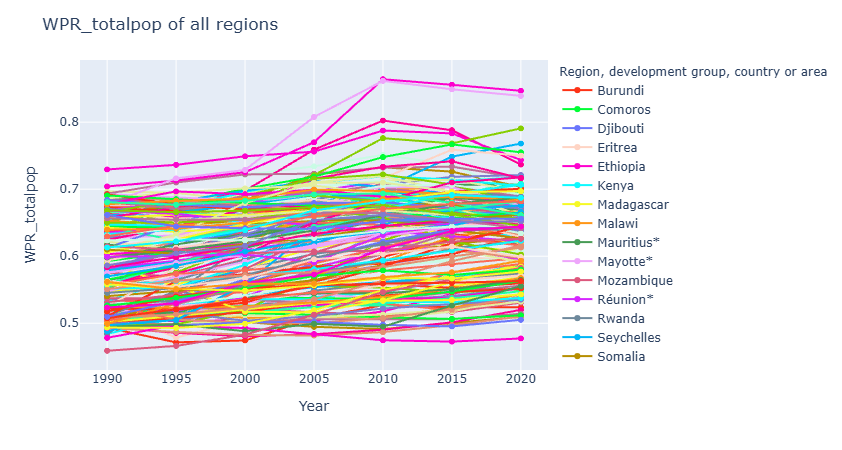

In [26]:
fig = px.line(data_CR, x='Year', y = 'WPR_totalpop', color = 'Region, development group, country or area', color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(title='WPR_totalpop of all regions', xaxis_title='Year', yaxis_title='WPR_totalpop')
fig.show()

Use plotly.express library functions to create entire figures of 'APR_totalpop' at once:

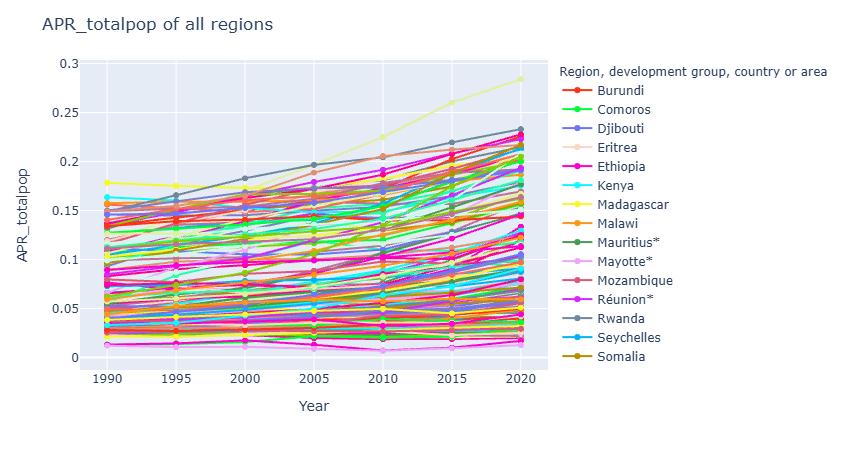

In [27]:
fig = px.line(data_CR, x='Year', y = 'APR_totalpop', color = 'Region, development group, country or area', color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(title='APR_totalpop of all regions', xaxis_title='Year', yaxis_title='APR_totalpop')
fig.show()

Use plotly.express library functions to create entire figures of 'WPR_migrants' at once:

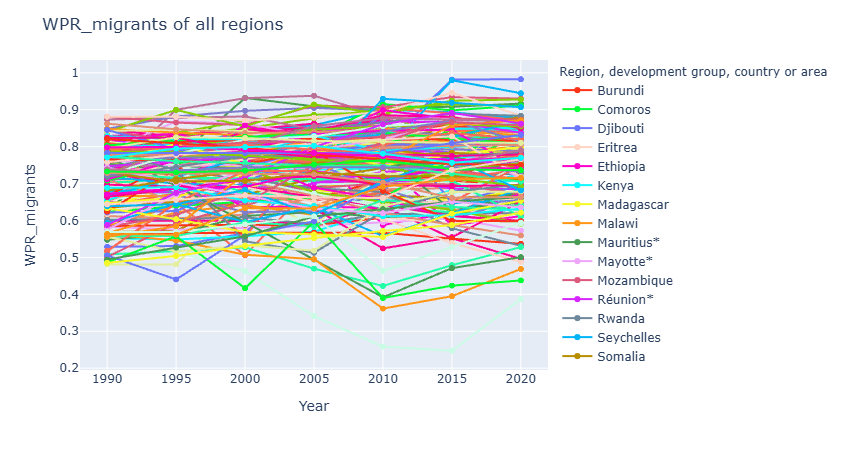

In [28]:
fig = px.line(data_CR, x='Year', y = 'WPR_migrants', color = 'Region, development group, country or area', color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(title='WPR_migrants of all regions', xaxis_title='Year', yaxis_title='WPR_migrants')
fig.show()

Use plotly.express library functions to create entire figures of 'APR_migrants' at once:

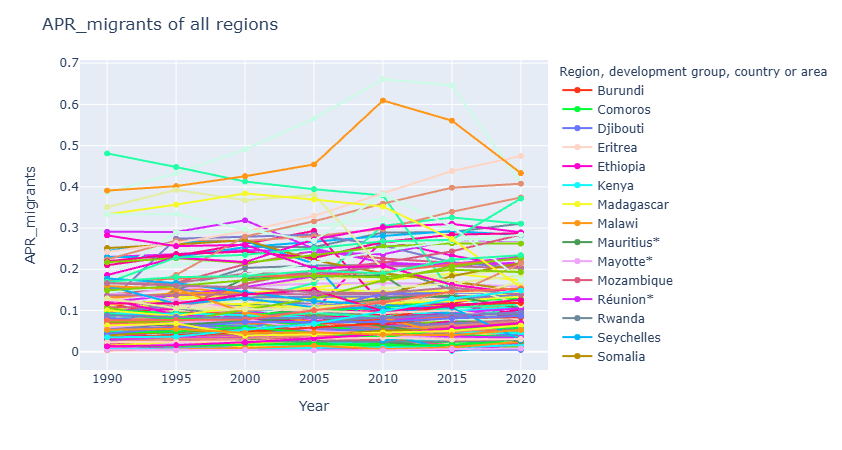

In [29]:
fig = px.line(data_CR, x='Year', y = 'APR_migrants', color = 'Region, development group, country or area', color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(title='APR_migrants of all regions', xaxis_title='Year', yaxis_title='APR_migrants')
fig.show()

The correlation above the above four Proportion variables, **WPR_totalpop**, **APR_totalpop**, **WPR_migrants** and **APR_migrants**, especially that between totalpop's and migrants', are what we will be insterested in.

## **Raising forward some Hypothesis**


Hypothesis is defined in two ways - null hypothesis and alternative hypothesis. Null hypothesis is a statistical hypothesis which assumes that the difference in observations is due to a random factor. It is denoted by Ho. Alternative hypothesis is the opposite of null hypothesis. It assumes that the difference in observations is the result of a real effect. The alternate hypothesis is denoted by H1.

If we put the data of **APR_totalpop** and **WPR_migrants** together:

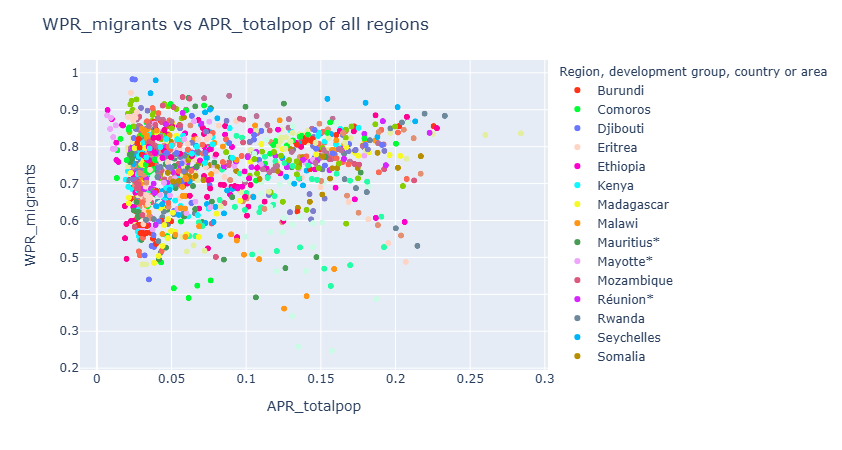

In [30]:
fig = px.scatter(data_CR, x='APR_totalpop', y = 'WPR_migrants', color = 'Region, development group, country or area', color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers')
fig.update_layout(title='WPR_migrants vs APR_totalpop of all regions', xaxis_title='APR_totalpop', yaxis_title='WPR_migrants')
fig.show()

Let's raise forward the first hypothesis about this data:

$ 𝐻_{0} $ There is no correlation between the **APR_totalpop** and **WPR_migrants** for all regions. \
$ 𝐻_{A} $ There is correlation between the **APR_totalpop** and **WPR_migrants** for all regions.

If we put the data of **WPR_totalpop** and **APR_migrants** together:

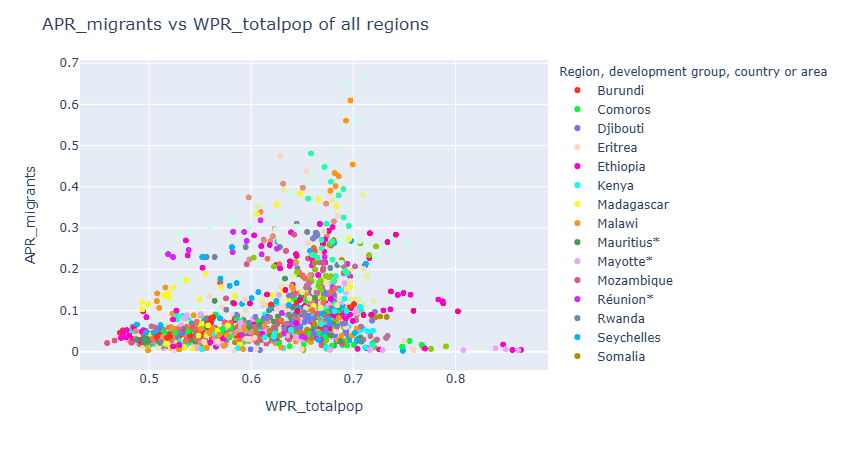

In [31]:
fig = px.scatter(data_CR, x='WPR_totalpop', y = 'APR_migrants', color = 'Region, development group, country or area', color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers')
fig.update_layout(title='APR_migrants vs WPR_totalpop of all regions', xaxis_title='WPR_totalpop', yaxis_title='APR_migrants')
fig.show()

Let's raise forward the second hypothesis about this data:

$ 𝐻_{0} $ There is no correlation between the **WPR_totalpop** and **APR_migrants** for all regions. \
$ 𝐻_{A} $ There is correlation between the **WPR_totalpop** and **APR_migrants** for all regions.

If we make deeper invesigation on the gradient of the variables, i.e.that of **APR_totalpop** and **WPR_migrants**, what new discoveries can be make? We use above self-defined function but on newly-created variables:

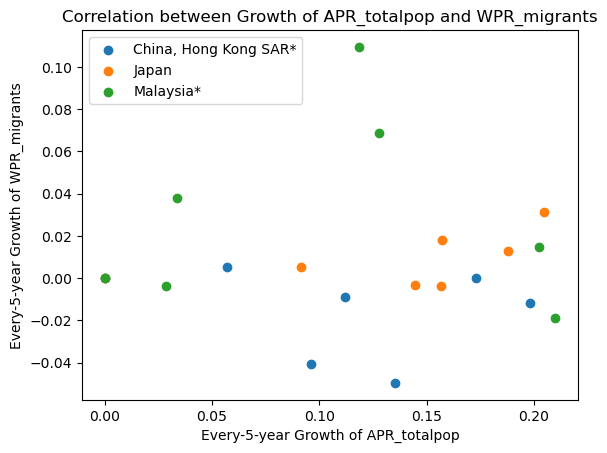

In [32]:
def cor4gradient(index1, index2, target_regions):
    ax = plt.axes()
    # Label the axes
    ax.set(xlabel='Every-5-year Growth of '+index1, ylabel='Every-5-year Growth of '+index2, title='Correlation between Growth of '+index1+' and '+index2)
    for target_region in target_regions:
        data_CR_i = data_CR[data_CR['Region, development group, country or area']==target_region].sort_values(by='Year', ascending=True)
        growth1_rates = []
        for i, vi in enumerate(data_CR_i[index1]):
            if i==0:
                v0 = vi
            growth1_rate = (vi - v0)/v0
            growth1_rates.append(growth1_rate)
            v0 = vi
        growth2_rates = []
        for i, vi in enumerate(data_CR_i[index2]):
            if i==0:
                v0 = vi
            growth2_rate = (vi - v0)/v0
            growth2_rates.append(growth2_rate)
            v0 = vi
        ax.scatter(growth1_rates, growth2_rates, label=target_region)
    ax.legend()

cor4gradient('APR_totalpop', 'WPR_migrants', ['China, Hong Kong SAR*', 'Japan', 'Malaysia*'])

We can see the correlation patterns may depend on what the country or region is. Let's raise forward the third hypothesis about this data:

$ 𝐻_{0} $ There is no correlation between the **APR_totalpop** and **WPR_migrants** for all regions. \
$ 𝐻_{A} $ There is correlation between the **APR_totalpop** and **WPR_migrants** for **some** regions.

## **Thinking for next steps**

We can see that different countries or areas may follow different rules. So can we cluster the country and area type based on the above four Proportion variables, **WPR_totalpop**, **APR_totalpop**, **WPR_migrants** and **APR_migrants**, especially that between totalpop's and migrants'? This will be the next steps in analyzing this data.

There are some other fields and rows in this data which we has dropped. For example, the rows representing the where the country/area type such as 'Developed regions', 'Less developed regions', 'Less developed regions, excluding least developed countries', 'Less developed regions, excluding China', 'Least developed countries', 'Land-locked Developing Countries (LLDC)', 'Small island developing States (SIDS)', 'High-income countries', 'Middle-income countries', 'Upper-middle-income countries', 'Lower-middle-income countries', 'Low-income countries', where 'Type of data' is not non-null. These classifications may serve as a useful label for our further model-driven predictions.

The quality of the data of <code>undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx</code> is fairly good, without much missing values despite some data shortages and relative large time grains. Such container of well-sliced data in various dimensions does provide potentials to mine vast information. In summary, this dataset of UN is ideal for data analysis and prediction modeling. 

For next steps, **it may be helpful to draw precise conclusions if every-year data of total population and migrant stock between 1990 and 2020 can be provided. And it will provoke more thinkings on mechanisms with such additional data as GDP per capita, Human Development Index and other social-economic indicators specific to countries and areas during the given period** (considering the country/area typies have not been mapped to countries and areas in current dataset). Insights from these further analysis can help us in decision making when it comes to comprehending population aging and labour force migrant.

## **Steps in testing (Taking 1st Hypothesis)**

As mentioned above, the 1st hypothesis about this data is:

$ 𝐻_{0} $ There is no correlation between the **APR_totalpop** and **WPR_migrants** for all regions. \
$ 𝐻_{A} $ There is correlation between the **APR_totalpop** and **WPR_migrants** for all regions.

Let's use <code>sns.jointplot</code> to see how both variables distribute:

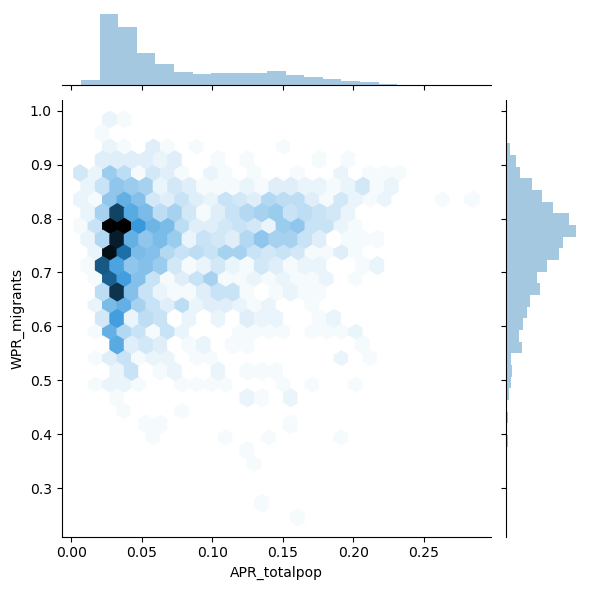

In [36]:
sns.jointplot(data=data_CR, x=data_CR['APR_totalpop'], y=data_CR['WPR_migrants'], kind='hex')

We can see that values of **WPR_migrants** is in normal distribution, but values of **APR_totalpop** is in positive skew, demonstrating much fewer countries suffer the population ageing problem. To fit the decision criteria, we should make some transformations.

Look at the roadmap, we just evenly divide the data into two groups: one with **APR_totalpop** higher than the median, the other with **APR_totalpop** lower than the median. We construct two slices of the data_CR by using a new field of **G4APR_totalpop**.

In [98]:
B4APR_totalpop = data_CR['APR_totalpop'].median()
data_CR.loc[data_CR['APR_totalpop']>B4APR_totalpop, 'G4APR_totalpop'] = 'high_APR_totalpop'
data_CR.loc[data_CR['APR_totalpop']<=B4APR_totalpop, 'G4APR_totalpop'] = 'low_APR_totalpop'

Let's take a brief look at the data we are insterested in. Now, plot the distribution of **WPR_migrants** values for the two groups using seaborn's distplot() function.

[Text(0.5, 1.0, 'WPR_migrants divided by APR_totalpop')]

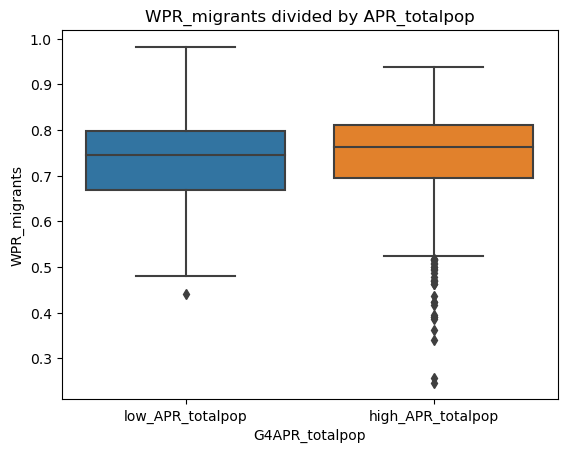

In [99]:
sns.boxplot(x=data_CR['G4APR_totalpop'], y=data_CR['WPR_migrants'], data=data_CR).set(title='WPR_migrants divided by APR_totalpop')

We can see that despite the significant gap between the average values of **APR_totalpop**, the **WPR_migrants** of the 2 groups do not differ that much. But considering the sample size, there's still uncertainty. Next, to draw the precise decisions using scipy.stats library and functions. 

To set the criteria for a decision, we state the level of significance for a test at 5%. Based on the level of significance, we can make a decision whether to accept the null hypothesis and reject the alternate, and vise versa.

A t-test is used for testing the mean of one population against a standard or comparing the means of two populations. Now, we will calculate t-value and p-value of charges for high and low APR_totalpop groups.

In [105]:
alpha = 0.05
low_APR_totalpop = data_CR.loc[data_CR.G4APR_totalpop=="low_APR_totalpop"].WPR_migrants
high_APR_totalpop = data_CR.loc[data_CR.G4APR_totalpop=="high_APR_totalpop"].WPR_migrants
t_value1, p_value1 = stats.ttest_ind(low_APR_totalpop, high_APR_totalpop)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  -1.452567497096338 , p_value1 =  0.1465702189726958


Next, it is useful to print 'if/else' statements to make our conclusions about the the hypothesis.

In [106]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between bmi of females and bmi of males.")
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.")

Conclusion: since p_value 0.1465702189726958 is greater than alpha 0.05 
Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.


We can conclude that **there is no correlation between the APR_totalpop and WPR_migrants for all regions based on t-test**. But, under other testing methods, and for some specific countries and period, the story may be rewrote.

## Author


[Tianxiang Yang](https://www.linkedin.cn/incareer/comm/in/tianxiang-yang-bb4b02a5)


Copyright © 2020 IBM Corporation. All rights reserved.
